# Análisis TF-IDF

Dentro de este documento se realizará un análisis al TF-IDF obtenido a partir de un pequeño corpus recolectado con los términos y condiciones de algunos servicios en internet.

In [2]:
#Importar elementos necesarios de las librerías
import nltk
import os
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import PlaintextCorpusReader, stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.stem.snowball import SpanishStemmer
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [24]:
#Funciones auxiliares

"""
    Función para leer los textos de una ruta
    Entradas:
        path => Ruta del archivo. // Tipo: string
    Salidas:
        corpus => Conjuntos de documentos de la ruta. //Tipo: list(string) 
        size => Tamaño de cada documento. // Tipo: list(int)
"""
def read_files(path):
    corpus, size = [], []
    files = os.listdir(path)
    for file in files:
        texto = PlaintextCorpusReader(ruta, file)
        size.append(len(texto.words()))
        texto = texto.raw()
        """
        x = []
        for i in range(len(texto)):
            x.append(texto.__getitem__(i))
        """
        corpus.append(texto)
    return corpus, size

#Crea un dataframe a partir de un array que contenga el tf-idf de un corpus
def tf_idf_to_dataframe(array_tf_idf,path):
    files = os.listdir(path)
    for i, doc in enumerate(array_tf_idf):
        title = files[i].replace(".txt","")
        tf_idf_single_document = list(zip(tf_idf.get_feature_names(), doc, [i for _ in range(len(doc))], [title for _ in range(len(doc))]))
        if i == 0:
            df = pd.DataFrame(tf_idf_single_document, columns=['token', 'tf_idf','id_documento','nombre_documento'])
        else:
            df2 = pd.DataFrame(tf_idf_single_document, columns=['token', 'tf_idf','id_documento','nombre_documento'])
            df = df.append(df2)
    return df

#Función auxiliar para realizar graficos de barras
def plot_bar(title,x,y,x_name,y_name,scale=None):
    plt.bar(x, y, align='center', alpha=0.5)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    if scale != None: plt.yscale(scale)
    plt.title(title)
    plt.grid()
    plt.show()

#Grafica el tf-idf de cada documento de una ruta e imprime el tamaño de cada documento
def plot_tf_idf(array_tf_idf,path,size):
    files = os.listdir(path)
    for i, doc in enumerate(array_tf_idf):
        document_title = files[i].replace(".txt","")
        print("Cantidad de tokens del documento de {}: {}".format(document_title,size[i]))
        x_axis = [i for i in range(len(doc))]
        plot_bar(document_title,x_axis,doc,'Llaves del token','Tf-idf','log')
        
#Grafica el tf-idf máximo y promedio de cada token en el corpus
def plot_general_tf_idf(array_tf_idf,path,tokens):
    files = os.listdir(path)
    max_tf_idf, mean_tf_idf = [0 for _ in range(tokens)], [0 for _ in range(tokens)]
    for i, doc in enumerate(array_tf_idf):
        tf_idf_single_document = list(zip(tf_idf.get_feature_names(), doc, [i for _ in range(len(doc))]))
        document_title = files[i].replace(".txt","")
        max_tf_idf = [max(max_tf_idf[j],doc[j]) for j in range(tokens)]
        mean_tf_idf = [mean_tf_idf[j] + doc[j] for j in range(tokens)]
    mean_tf_idf = [mean_tf_idf[j]/(i+1) for j in range(tokens)]
    x_axis = [i for i in range(tokens)]
    plot_bar('Tf-idf máximo',x_axis,max_tf_idf,'Llave del token','Tf-idf','log')
    plot_bar('Tf-idf promedio',x_axis,mean_tf_idf,'Llave del token','Tf-idf','log')
    
def show_top_tokens(df,path,n):
    files = os.listdir(path)
    for text in files:
        title = text.replace(".txt","")
        print(df[df.nombre_documento == title].head(n),'\n\n')

In [4]:
#ruta = "D:/Documents/Documentos Universidad/Noveno/Proyecto de grado/textos"
ruta = "D:/Documents/Documentos Universidad/Noveno/Proyecto de grado/textos"
corpus, tamaño = read_files(ruta)

tf_idf = TfidfVectorizer()

#Matriz tf-idf
result = tf_idf.fit_transform(corpus)

#print(result)

# Conocimiento de los datos
## Corpus

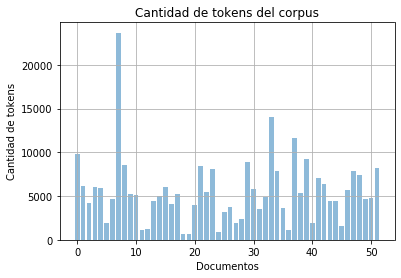

In [5]:
#Cantidad de tokens en cada documento
x_axis = [i for i in range(len(tamaño))]

plot_bar('Cantidad de tokens del corpus',x_axis,tamaño,'Documentos','Cantidad de tokens')

In [6]:
#Principales estadisticos
promedio = np.mean(tamaño)
desviacion = np.std(tamaño)
mediana = np.median(tamaño)
tamaño_ordenado = tamaño.copy()
tamaño_ordenado.sort()
minimo = tamaño_ordenado[0]
maximo = tamaño_ordenado[-1]
print("Minimo: ",minimo)
print("Mediana: ", mediana)
print("Máximo: ", maximo)
print("Promedio: ", promedio)
print("Desviación estandar:", desviacion)

Minimo:  669
Mediana:  5049.5
Máximo:  23681
Promedio:  5545.403846153846
Desviación estandar: 3803.6446603610198


In [7]:
#Cantidad de tokens únicos en todo el corpus
result.shape[1]

11133

In [8]:
#Tokens
tokens = tf_idf.get_feature_names()
tokens

['00',
 '000',
 '01',
 '013',
 '018000',
 '018000510510',
 '018000528888',
 '02',
 '041',
 '07',
 '08',
 '09763672',
 '10',
 '100',
 '1000',
 '10007',
 '101',
 '103',
 '106',
 '107',
 '1097',
 '11',
 '110019',
 '1128',
 '12',
 '120',
 '1201',
 '123',
 '123691',
 '125',
 '1266',
 '13',
 '1300',
 '1355',
 '1377',
 '14',
 '1401',
 '142',
 '1421',
 '1480',
 '14th',
 '15',
 '150',
 '150th',
 '1581',
 '16',
 '1600',
 '1601',
 '17',
 '175',
 '1798',
 '18',
 '1855',
 '19',
 '192',
 '1974',
 '1980',
 '1994',
 '1textbroker',
 '20',
 '200',
 '2001',
 '2003',
 '2008',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '20200416',
 '2021',
 '21',
 '2113',
 '212',
 '22',
 '227',
 '23',
 '2347',
 '2349',
 '236n',
 '237218316',
 '24',
 '242',
 '2460220',
 '2499',
 '25',
 '255',
 '260',
 '264',
 '27',
 '2704',
 '2772',
 '28006',
 '29',
 '2nd',
 '30',
 '307',
 '3077115',
 '31',
 '3122122',
 '316',
 '3170100',
 '32',
 '320',
 '322',
 '32a',
 '33',
 '34',
 

In [9]:
tokens.reverse()
tokens

['útiles',
 'útil',
 'únicos',
 'único',
 'únicas',
 'únicamente',
 'única',
 'únete',
 'últimos',
 'último',
 'últimasfacturaspara',
 'últimas',
 'última',
 'órganos',
 'órdenes',
 'óptimos',
 'óptimo',
 'ítem',
 'íntimos',
 'íntimo',
 'íntima',
 'íntegro',
 'íntegramente',
 'índole',
 'índices',
 'índice',
 'íconos',
 'ícono',
 'éxito',
 'étnico',
 'ético',
 'éstos',
 'éste',
 'éstas',
 'ésta',
 'él',
 'échale',
 'áreas',
 'área',
 'árbitros',
 'árbitro',
 'ánimo',
 'ángeles',
 'ámsterdam',
 'ámbitos',
 'ámbito',
 'álcalis',
 'álbumes',
 'álbum',
 'ágil',
 'áfrica',
 'ácidos',
 'zoominfo',
 'zonas',
 'zona',
 'zentrums',
 'zelanda',
 'zapatos',
 'zahri',
 'youtube',
 'youtu',
 'yourname',
 'your',
 'you',
 'york',
 'yoga',
 'ya',
 'xoom',
 'xml',
 'xiii',
 'xii',
 'xi',
 'xenófoba',
 'xbox',
 'www',
 'world',
 'word',
 'wlan',
 'with',
 'windowslifecycle',
 'windows',
 'window',
 'willow',
 'will',
 'wifi',
 'widgets',
 'wide',
 'wi',
 'who',
 'which',
 'whether',
 'wherever',
 'wher

## Matriz TF-IDF

In [10]:
#Tipo matriz tf-idf
type(result)

scipy.sparse.csr.csr_matrix

In [11]:
#dimensión de la matriz
result.shape

(52, 11133)

In [12]:
array_tf_idf = result.toarray()

df = tf_idf_to_dataframe(array_tf_idf,ruta)
df = df.query('tf_idf > 0').sort_values(by='tf_idf', ascending=False)

In [41]:
df.head(60)

,token,tf_idf,id_documento,nombre_documento
3077,deezer,0.756487,7,deezer
2997,de,0.740263,12,gdo-privacidad
2997,de,0.697828,28,nintendo-privacidad
7869,pinterest,0.693126,31,pinterest-condiciones
9911,spotify,0.681246,39,spotify
2997,de,0.681243,0,adobe-condiciones
2997,de,0.663134,16,homecenter-privacidad
2997,de,0.659835,49,whatsApp-condiciones
2997,de,0.659396,30,paypal-privacidad
2997,de,0.659075,8,discord


In [42]:
df.tail(60)

,token,tf_idf,id_documento,nombre_documento
10231,telefonía,0.000611,7,deezer
4044,encargado,0.000611,7,deezer
2207,comunicar,0.000611,7,deezer
4329,especialmente,0.000611,7,deezer
10170,sólo,0.000592,7,deezer
6634,mal,0.000592,7,deezer
2803,creado,0.000592,7,deezer
9192,requisito,0.000592,7,deezer
5884,infringe,0.000592,7,deezer
1861,cinco,0.000592,7,deezer


Cantidad de tokens del documento de adobe-condiciones: 9764


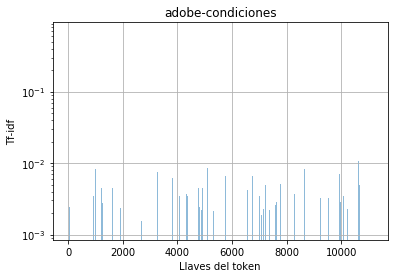

Cantidad de tokens del documento de adobe-privacidad: 6125


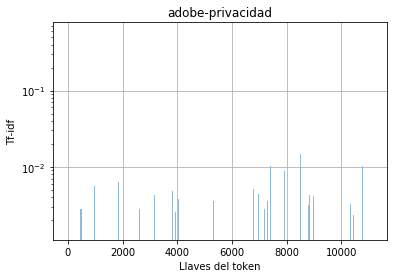

Cantidad de tokens del documento de aws: 4244


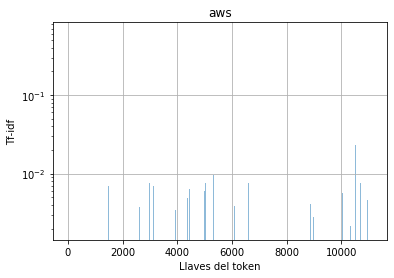

Cantidad de tokens del documento de azure-pagos: 6038


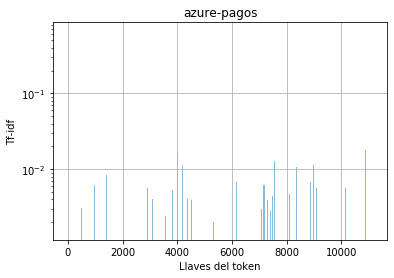

Cantidad de tokens del documento de chrome-privacidad: 5905


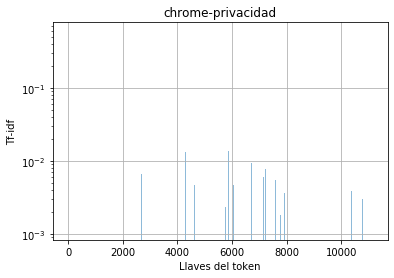

Cantidad de tokens del documento de civica: 1978


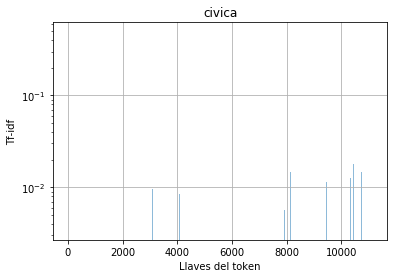

Cantidad de tokens del documento de colboletos: 4701


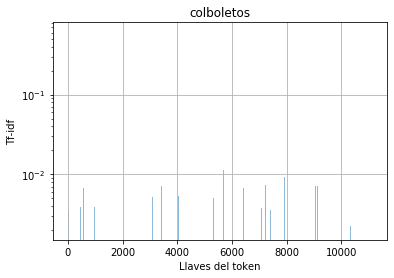

Cantidad de tokens del documento de deezer: 23681


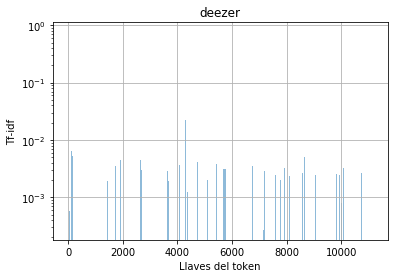

Cantidad de tokens del documento de discord: 8589


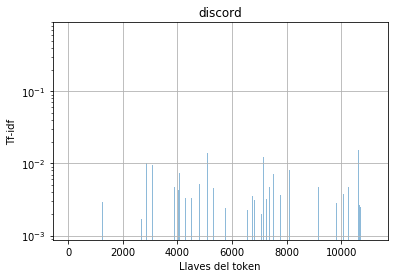

Cantidad de tokens del documento de facebook-condiciones: 5192


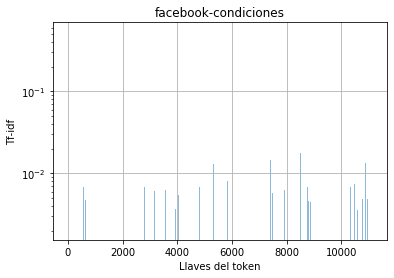

Cantidad de tokens del documento de facebook-privacidad: 5107


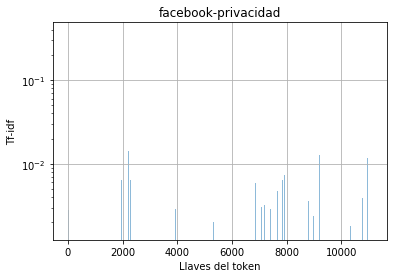

Cantidad de tokens del documento de gdo-pagos: 1177


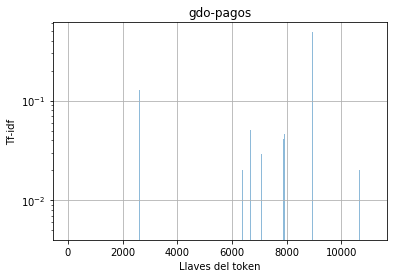

Cantidad de tokens del documento de gdo-privacidad: 1192


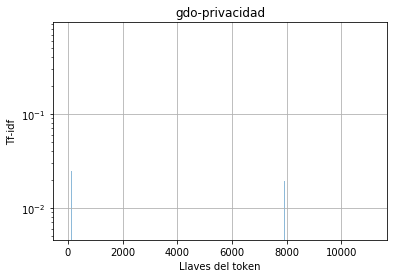

Cantidad de tokens del documento de google-condiciones: 4403


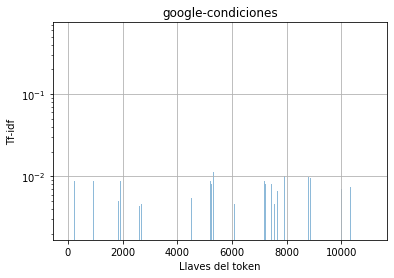

Cantidad de tokens del documento de google-privacidad: 4992


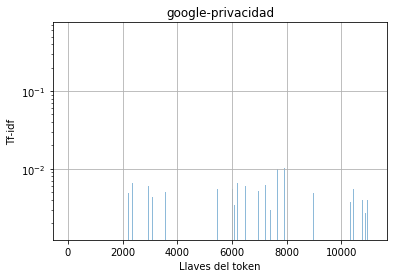

Cantidad de tokens del documento de homecenter-condiciones: 6058


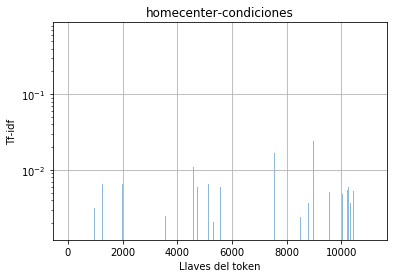

Cantidad de tokens del documento de homecenter-privacidad: 4057


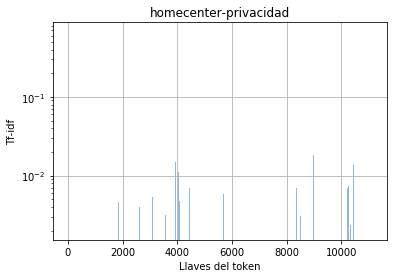

Cantidad de tokens del documento de instagram: 5255


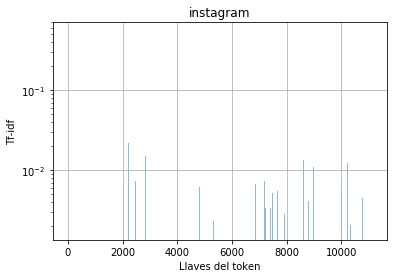

Cantidad de tokens del documento de libreria_nacional-cambios: 690


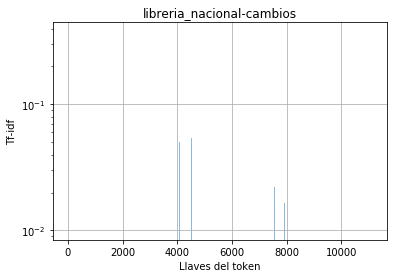

Cantidad de tokens del documento de libreria_nacional-condiciones: 669


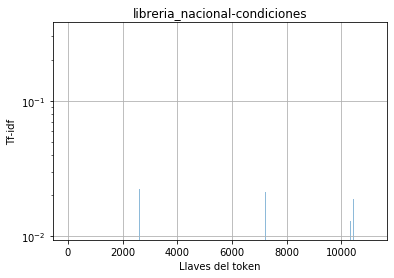

Cantidad de tokens del documento de libreria_nacional-privacidad: 3961


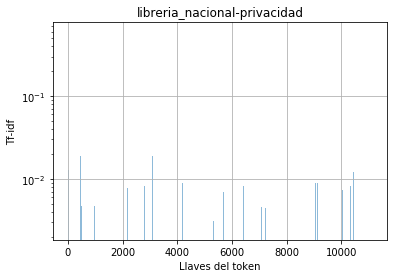

Cantidad de tokens del documento de linio: 8442


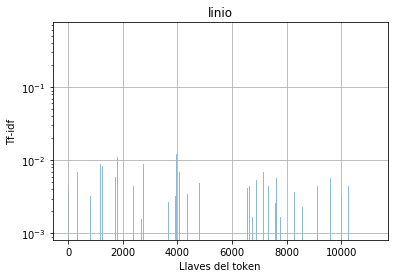

Cantidad de tokens del documento de linkedin-condiciones: 5432


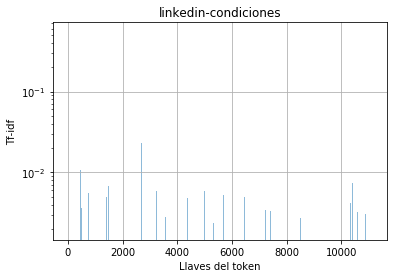

Cantidad de tokens del documento de linkedin-privacidad: 8061


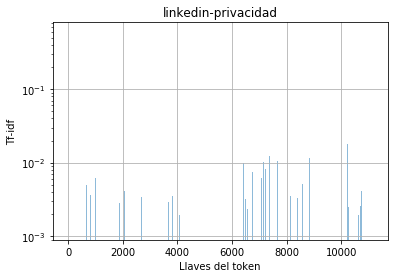

Cantidad de tokens del documento de mozilla-privacidad: 949


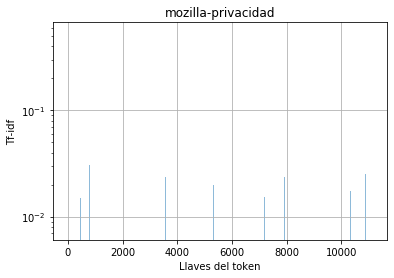

Cantidad de tokens del documento de netflix: 3131


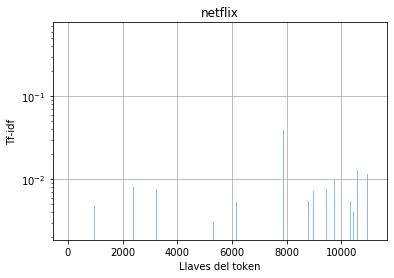

Cantidad de tokens del documento de nintendo-condiciones: 3793


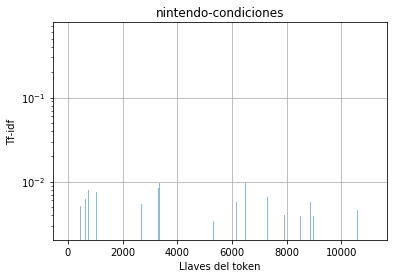

Cantidad de tokens del documento de nintendo-pagos: 1908


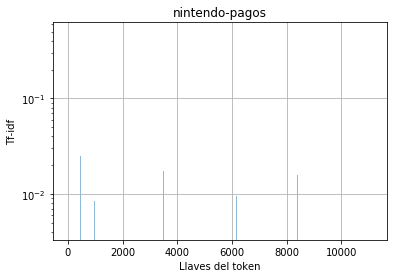

Cantidad de tokens del documento de nintendo-privacidad: 2403


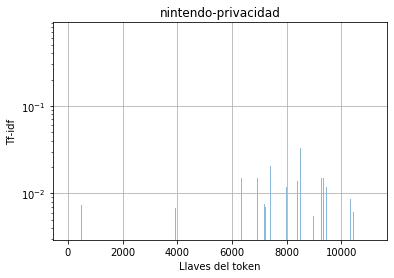

Cantidad de tokens del documento de olimpica: 8915


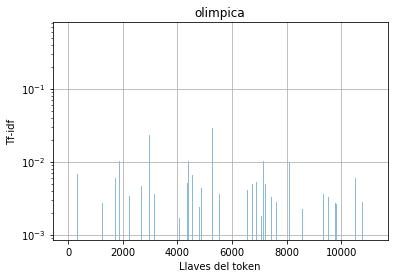

Cantidad de tokens del documento de paypal-privacidad: 5854


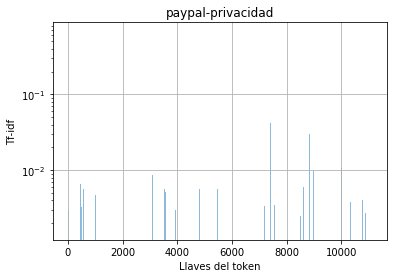

Cantidad de tokens del documento de pinterest-condiciones: 3505


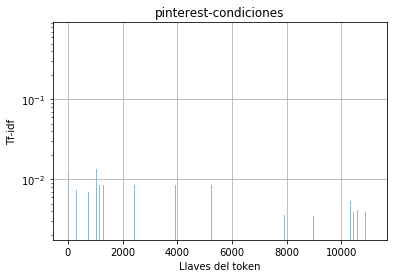

Cantidad de tokens del documento de pinterest-privacidad: 4841


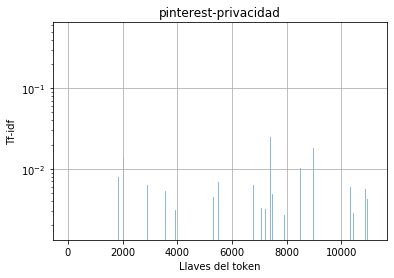

Cantidad de tokens del documento de platzi: 14057


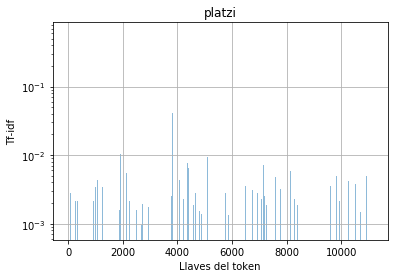

Cantidad de tokens del documento de quest: 7829


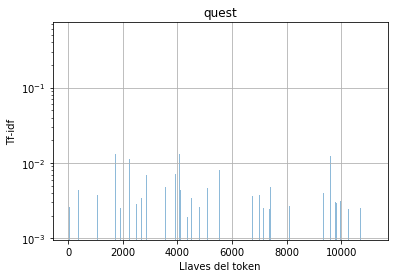

Cantidad de tokens del documento de segurosbolivar-condiciones: 3683


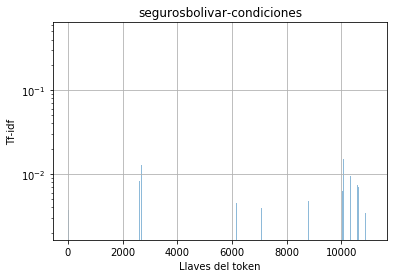

Cantidad de tokens del documento de segurosbolivar-privacidad: 1110


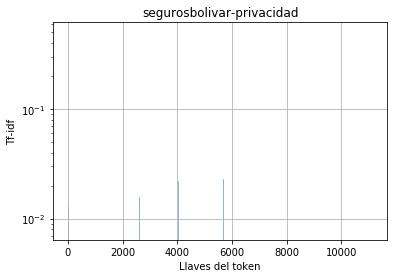

Cantidad de tokens del documento de snapchat-condiciones: 11683


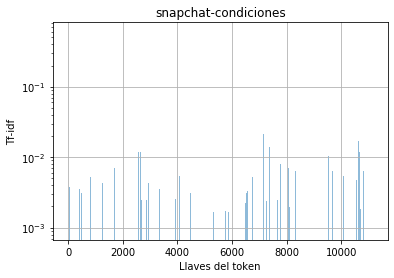

Cantidad de tokens del documento de snapchat-privacidad: 5298


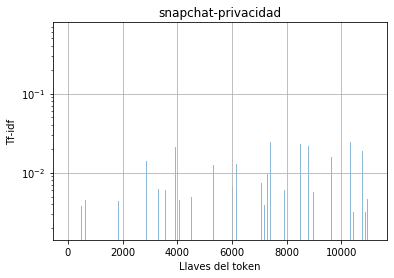

Cantidad de tokens del documento de spotify: 9249


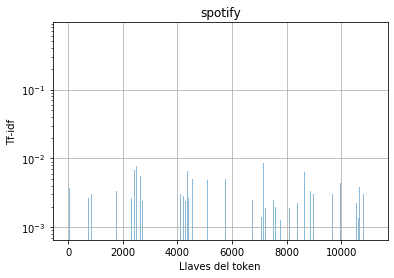

Cantidad de tokens del documento de superinter: 1954


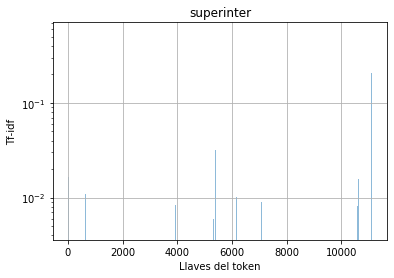

Cantidad de tokens del documento de textbroker-autores: 7111


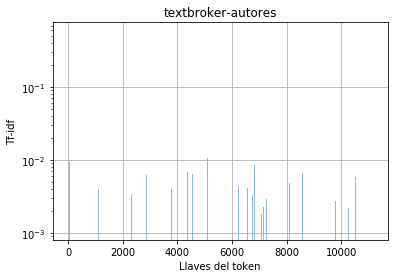

Cantidad de tokens del documento de textbroker-clientes: 6431


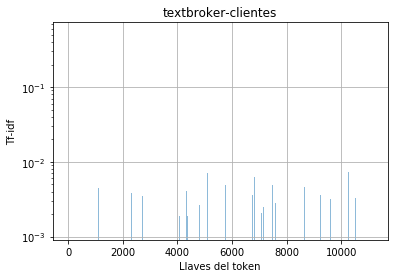

Cantidad de tokens del documento de toyota-privacidad: 4409


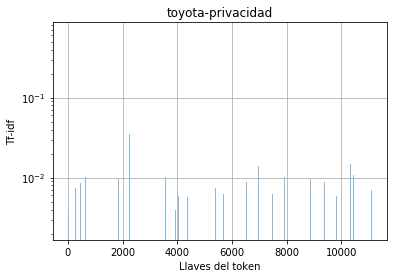

Cantidad de tokens del documento de twitter-condiciones: 4441


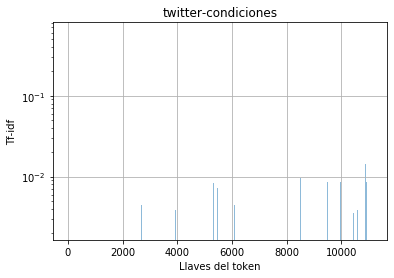

Cantidad de tokens del documento de twitter-privacidad: 1537


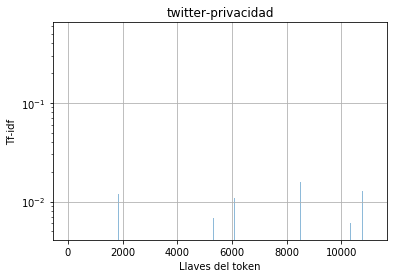

Cantidad de tokens del documento de uber: 5681


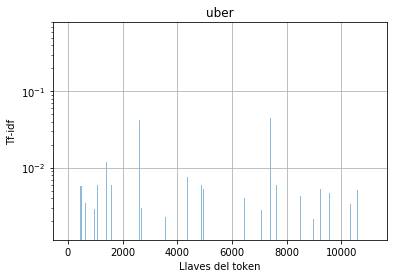

Cantidad de tokens del documento de udemy-condiciones: 7869


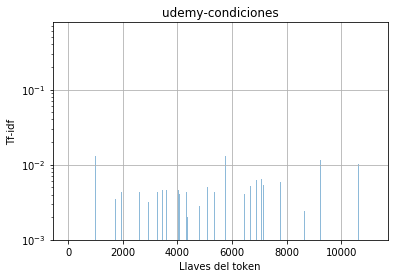

Cantidad de tokens del documento de udemy-privacidad: 7417


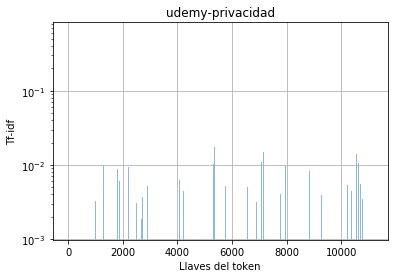

Cantidad de tokens del documento de whatsApp-condiciones: 4642


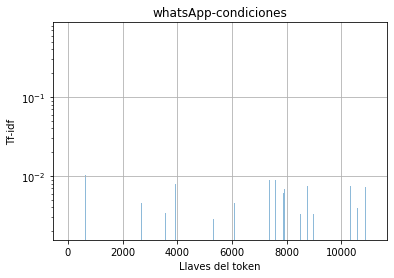

Cantidad de tokens del documento de whatsApp-privacidad: 4781


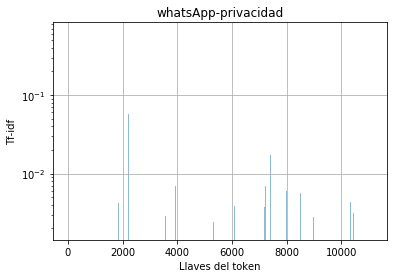

Cantidad de tokens del documento de windows10: 8167


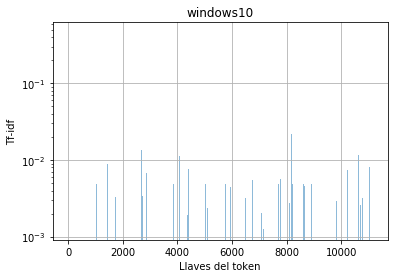

In [14]:
plot_tf_idf(array_tf_idf,ruta,tamaño)

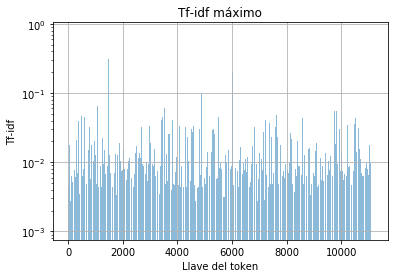

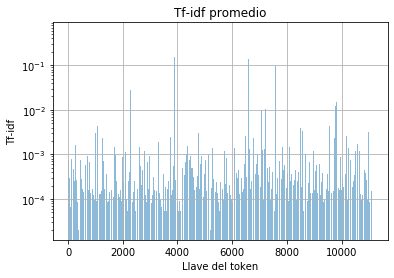

In [22]:
plot_general_tf_idf(array_tf_idf,ruta,result.shape[1])

In [25]:
show_top_tokens(df,ruta,20)

             token    tf_idf  id_documento   nombre_documento
2997            de  0.681243             0  adobe-condiciones
6597           los  0.213277             0  adobe-condiciones
580          adobe  0.207321             0  adobe-condiciones
3890            el  0.199817             0  adobe-condiciones
9816      software  0.197495             0  adobe-condiciones
4032            en  0.165652             0  adobe-condiciones
6355            la  0.158404             0  adobe-condiciones
9933            su  0.153228             0  adobe-condiciones
10689        usted  0.149456             0  adobe-condiciones
8577           que  0.148051             0  adobe-condiciones
9664     servicios  0.147706             0  adobe-condiciones
6376           las  0.134592             0  adobe-condiciones
1916         cloud  0.112236             0  adobe-condiciones
2560     contenido  0.101396             0  adobe-condiciones
2281   condiciones  0.099735             0  adobe-condiciones
2821    

# Plan de procesamiento inicial

- Stopwords: números, URL, ncs, países, terminaciones legales (ltda., S.A.S, inc, etc)
- Comparar comportamiento con y sin marcas comerciales, para determinar sí deberían ser agregadas a las stopwords.
- Aplicar stemming y realizar analisis para identificar algunas otras stopwords.
- Recolectar más documentos asociados a la privacidad y los pagos, pues actualmente las palabras identificadas no tiene mucha relevancia. 
- Eliminar facebook-privacidad (Tiene muchas palabras en inglés con alta frecuencia que sesgan esta técnica).